# Notebook Summary

In this notebook I optimize a KNN model

In [1]:
import autoreload
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import Classes

In [112]:
import pickle
from sklearn.linear_model import LogisticRegression
import sklearn.model_selection
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import ADASYN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import make_scorer

# Pickle in Data

In [3]:
# Pickle in factorized data

path = r"C:\Users\Andrew\Documents\Metis\TikTok_Hit_Predictor\Pickle\supervised_factorized.pkl"

df = pickle.load(open(path,'rb'))
df.head(2)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,year,spotify_artists,success
0,0.880,0.501,2.0,-6.774,1.0,0.062,0.0494,0.0695,0.4360,0.459,120.038,2020.0,0,1.0
1,0.935,0.454,1.0,-7.509,1.0,0.375,0.0194,0.0000,0.0824,0.357,133.073,2018.0,1,1.0


# Part 1 Including Artists

# CV KNN

In [13]:
# Seperate features from label

X = df.loc[:,['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','year','spotify_artists']]

y = df['success']

In [14]:
#Split data into 2: 60% train, 8% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [15]:
# Oversample

ada = ADASYN(random_state=42)

# Oversample training data
X_adasyn_tr, y_adasyn_tr = ada.fit_resample(X_train,y_train)

In [16]:
# Scale features 
scaler = StandardScaler()
X_adasyn_tr = scaler.fit_transform(X_adasyn_tr)

In [17]:
# specify "parameter distributions" rather than a "parameter grid"
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
param_dist = dict(n_neighbors=k_range, weights=weight_options)

In [18]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [19]:
# Define KNN
knn = KNeighborsClassifier()

In [20]:
# n_iter controls the number of searches
rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=42)
rand.fit(X_adasyn_tr, y_adasyn_tr)
rand.cv_results_

{'mean_fit_time': array([0.02301886, 0.02297039, 0.02228544, 0.02429276, 0.02208788,
        0.02287917, 0.02305613, 0.02266903, 0.0238107 , 0.02386217]),
 'std_fit_time': array([0.00075591, 0.00063849, 0.00046279, 0.00144649, 0.00030154,
        0.00051997, 0.00071991, 0.00044569, 0.00149124, 0.0014239 ]),
 'mean_score_time': array([0.09649801, 0.11381836, 0.20261364, 0.19710577, 0.14388981,
        0.21995687, 0.18234768, 0.21348929, 0.17221842, 0.20595117]),
 'std_score_time': array([0.00421537, 0.00533509, 0.00941647, 0.00510034, 0.00464044,
        0.00627905, 0.00490991, 0.00349659, 0.0086474 , 0.00850547]),
 'param_weights': masked_array(data=['uniform', 'distance', 'uniform', 'distance',
                    'distance', 'uniform', 'distance', 'uniform',
                    'uniform', 'distance'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_n_neighbors': 

In [21]:
# examine the best model
print(rand.best_score_)
print(rand.best_params_)
print(rand.best_estimator_)

0.920571681736782
{'weights': 'uniform', 'n_neighbors': 1}
KNeighborsClassifier(n_neighbors=1)


# Applying best params

In [22]:
# Seperate features from label

X = df.loc[:,['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','year','spotify_artists']]

y = df['success']

In [23]:
#Split data into 2: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [24]:
# Oversample

ada = ADASYN(random_state=42)

# Oversample training data
X_adasyn_tr, y_adasyn_tr = ada.fit_resample(X_train,y_train)

In [27]:
# Scale features 
scaler = StandardScaler()
X_adasyn_tr = scaler.fit_transform(X_adasyn_tr)
X_test = scaler.fit_transform(X_test)

In [58]:
# run initial logistic regression
# Define KNN
model = KNeighborsClassifier(n_neighbors = 1, weights = 'uniform')
model.fit(X_adasyn_tr, y_adasyn_tr)
y_predict = model.predict(X_test)

In [59]:
Classes.train_scores(model,X_adasyn_tr, y_adasyn_tr)

Train Scores
Accuracy score: 100.00%


In [60]:
Classes.test_scores(y_test,y_predict)

Test Scores
Score:  75.37%
F1 score:  45.38%
Precision:  31.27%,  Test Recall:  82.63%


# Part 2 - Excluding Artists

In [113]:
# Seperate features from label

X = df.loc[:,['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','year']]

y = df['success']

In [114]:
#Split data into 2: 60% train, 8% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [115]:
# Oversample

ada = ADASYN(random_state=42)

# Oversample training data
X_adasyn_tr, y_adasyn_tr = ada.fit_resample(X_train,y_train)

In [116]:
# Scale features 
scaler = StandardScaler()
X_adasyn_tr = scaler.fit_transform(X_adasyn_tr)

In [117]:
# define the parameter values that should be searched
k_range = list(range(1, 31))

# list of weight options
weight_options = ['uniform', 'distance']

In [118]:
# create a parameter grid: map the parameter names to the values that should be searched
# dictionary = dict(key=values, key=values)
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [119]:
# Define KNN
knn = KNeighborsClassifier()

In [120]:
# Make scorer
f1_scorer = make_scorer(f1_score, pos_label= 1)

In [121]:
# instantiate and fit the grid
# exhaustive grid-search because it's trying every combination
# 10-fold cross-validation is being performed 30 x 2 = 60 times

grid = GridSearchCV(knn, param_grid, cv=10, scoring= f1_scorer)

In [122]:
# Fit
grid.fit(X_adasyn_tr, y_adasyn_tr)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring=make_scorer(f1_score, pos_label=1))

In [123]:
# view the complete results (list of named tuples)
grid.cv_results_

{'mean_fit_time': array([0.02137105, 0.02171187, 0.02163095, 0.02157691, 0.0210597 ,
        0.02101486, 0.02194431, 0.0219964 , 0.02107179, 0.0233686 ,
        0.02479386, 0.02514424, 0.0241385 , 0.02401905, 0.02477744,
        0.02462306, 0.02157624, 0.0205399 , 0.0212595 , 0.02244656,
        0.02368686, 0.02406447, 0.02285278, 0.02313862, 0.02474699,
        0.02236249, 0.0217917 , 0.02258697, 0.02237883, 0.02213495,
        0.02258589, 0.02231741, 0.0239867 , 0.02154748, 0.02127831,
        0.02103138, 0.02231586, 0.0226712 , 0.02283404, 0.02280908,
        0.02376313, 0.02299638, 0.02278328, 0.02159765, 0.02244699,
        0.02256246, 0.02321317, 0.02271805, 0.02308841, 0.02384131,
        0.02148881, 0.02263079, 0.02258608, 0.02228251, 0.02247477,
        0.02263746, 0.02092602, 0.02204788, 0.02195203, 0.021662  ]),
 'std_fit_time': array([0.00054086, 0.00110761, 0.00090527, 0.00074722, 0.00060094,
        0.00070229, 0.0009271 , 0.00097401, 0.00067514, 0.00170376,
        0.002

In [124]:
# examine the best model

# Single best score achieved across all params (k)
print(grid.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

0.885730640682711
{'n_neighbors': 1, 'weights': 'uniform'}
KNeighborsClassifier(n_neighbors=1)


# Applying the best params

In [61]:
# Seperate features from label

X = df.loc[:,['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','year']]

y = df['success']

In [62]:
#Split data into 2: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [63]:
# Oversample

ada = ADASYN(random_state=42)

# Oversample training data
X_adasyn_tr, y_adasyn_tr = ada.fit_resample(X_train,y_train)

In [64]:
# Scale features 
scaler = StandardScaler()
X_adasyn_tr = scaler.fit_transform(X_adasyn_tr)
X_test = scaler.fit_transform(X_test)

In [86]:
# run initial logistic regression
# Define KNN
model = KNeighborsClassifier(n_neighbors = 8, weights = 'uniform')
model.fit(X_adasyn_tr, y_adasyn_tr)
y_predict = model.predict(X_test)

In [87]:
Classes.train_scores(model,X_adasyn_tr, y_adasyn_tr)

Train Scores
Accuracy score:  87.23%


In [88]:
Classes.test_scores(y_test,y_predict)

Test Scores
Score:  65.73%
F1 score:  30.24%
Precision:  20.21%,  Test Recall:  60.00%


Text(93.77777777777786, 0.5, 'actual')

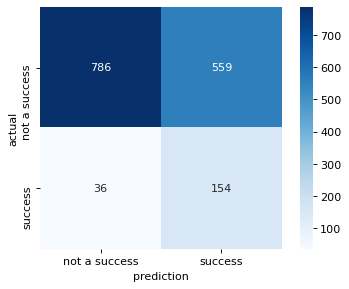

In [12]:
# Plot confusion matrix
success_confusion = confusion_matrix(y_test, y_predict)
plt.figure(dpi=80)
sns.heatmap(success_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
        xticklabels=['not a success', 'success'],
        yticklabels=['not a success', 'success']);
plt.xlabel('prediction')
plt.ylabel('actual')

# Pickle out model - no aritst

In [121]:
# Pickle model
path = r"C:\Users\Andrew\Documents\Metis\TikTok_Hit_Predictor\Pickle\knn_model.pkl"
pickle.dump(model, open(path, 'wb'))